# Machine Learning Project

## Problem Statement :

### Predicting Company Profit Based on Expenditure and State Information.

### Objective :

## Importing Libraries and Loading Dataset :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Loading the Companies dataset.
comp = pd.read_csv("companies.csv")
comp.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State,Profit
0,220349.20,236897.80,521784.10,Texas,242261.83
1,217597.70,251377.59,493898.53,Illinois,241792.06
2,208441.51,201145.55,457934.54,Washington,241050.39
3,199372.41,218671.85,433199.62,Texas,232901.99
4,197107.34,191391.77,416168.42,Washington,216187.94


In [33]:
comp.shape

(50, 11)

#### Total number of records present in the dataset are 50.

## Dataset Description :

## Initial Check-Up :

In [3]:
comp["Productivity_Exp"].unique()

array([220349.2 , 217597.7 , 208441.51, 199372.41, 197107.34, 186876.9 ,
       189615.46, 185298.13, 175542.52, 178334.88, 156913.08, 155671.96,
       148863.75, 146992.39, 174943.24, 169523.61, 133013.11, 149657.16,
       146749.16, 141419.7 , 131253.86, 133389.47, 128994.56, 122532.53,
       132044.01, 119664.71, 130328.87, 127107.6 , 121051.52, 120605.48,
       116994.48, 116136.38, 118408.86, 110493.95, 101426.07, 101014.02,
        83663.76,  99069.95,  75229.59,  93558.51,  83754.33,  82892.92,
        78640.93,  70505.73,  77177.74,  56000.23,  56315.46,  55000.  ,
        55542.05])

#### The Productivity_Exp column is a Continuous Numerical Data.

In [4]:
comp["Management_Exp"].unique()

array([236897.8 , 251377.59, 201145.55, 218671.85, 191391.77, 199814.71,
       247198.87, 245530.06, 248718.95, 208679.17, 210594.11, 191790.61,
       227320.38, 235495.07, 256547.42, 222616.84, 221597.55, 245077.58,
       214175.79, 253514.11, 213867.3 , 253773.43, 222782.75, 205751.03,
       199281.34, 239553.16, 244135.98, 227864.55, 282645.56, 253032.06,
       215641.28, 252701.92, 229219.61, 203057.49, 257693.92, 185047.44,
       227056.21, 151283.14, 165947.93, 182982.09, 218546.05, 184710.77,
       196189.63, 227382.3 , 254806.14, 224153.04, 215816.21, 235426.92,
       151743.15, 216983.8 ])

#### The Management_Exp column is a Continuous Numerical Data.

In [5]:
comp["Promotions_Exp"].unique()

array([521784.1 , 493898.53, 457934.54, 433199.62, 416168.42, 412861.36,
       177716.82, 373876.68, 361613.29, 354981.62, 279160.95, 299744.55,
       299839.44, 302664.93, 306512.92, 311776.23, 314346.06, 332574.31,
       344919.57,  50000.  , 348664.47, 349737.29, 353319.26, 354768.73,
       190574.81, 187962.62, 184050.07, 403183.81, 168148.2 , 157138.38,
       141131.24, 138218.23,  96085.25, 264634.81, 260797.67, 255517.64,
       251126.82, 247029.42, 235265.1 , 224999.3 , 222795.67, 214470.71,
       198001.11,  85534.17,  78334.72,  51903.93, 347114.46,  95173.06])

#### The Promotions_Exp column is a Continuous Numerical Data.

In [7]:
comp["State"].unique()

array(['Texas', 'Illinois', 'Washington'], dtype=object)

#### The State column is a Categorical Data.

In [8]:
comp["Profit"].unique()

array([242261.83, 241792.06, 241050.39, 232901.99, 216187.94, 206991.12,
       206122.51, 205752.6 , 202211.77, 199759.96, 196121.95, 194259.4 ,
       191585.52, 184307.35, 182602.65, 179917.04, 176992.93, 175370.37,
       174266.9 , 172776.86, 168474.03, 161313.02, 160352.25, 158733.99,
       158552.04, 157404.34, 155733.54, 155008.31, 153282.38, 151004.64,
       149937.59, 147483.56, 147427.84, 146778.92, 146712.8 , 146479.51,
       140708.19, 139949.14, 131229.06, 131005.76, 128239.91, 127798.83,
       121498.49, 119758.98, 115200.33, 114926.08,  99490.75,  92559.73,
        85673.41,  64681.4 ])

#### The Profit column is a Continuous Numerical Data.

## Asking Questions to data

## Pre-Processing of Data :

In [37]:
def scaler(col):
    min_val = col.min()
    max_val = col.max()
    res = (col - min_val)/(max_val - min_val)
    return res
comp["scaler_Productivity_Exp"] = scaler(comp["Productivity_Exp"])
comp["scaler_Management_Exp"] = scaler(comp["Management_Exp"])

In [21]:
def scaler(col):
    min_val = col.min()
    max_val = col.max()
    res = (col - min_val)/(max_val - min_val)
    return res
comp["scaler_Promotions_Exp"] = scaler(comp["Promotions_Exp"])
comp["scaler_Profit"] = scaler(comp["Profit"])

In [29]:
class_mapping = {"Texas":1,"Illinois":2,"Washington":3}
comp["State_encoded"] = comp["State"].map(class_mapping)

In [39]:
company = comp[["scaler_Productivity_Exp","scaler_Management_Exp","scaler_Promotions_Exp","State_encoded","scaler_Profit"]]
company.head()

,scaler_Productivity_Exp,scaler_Management_Exp,scaler_Promotions_Exp,State_encoded,scaler_Profit
0,1.000000,0.651744,1.000000,1,1.000000
1,0.983359,0.761972,0.940893,2,0.997355
2,0.927985,0.379579,0.864664,3,0.993178
3,0.873136,0.512998,0.812235,1,0.947292
4,0.859438,0.305328,0.776136,3,0.853171


#### The above Dataset is a Processed Data.

In [41]:
# Q1 
company["scaler_Productivity_Exp"].sum()

22.29270404695033

In [174]:
# Q2
grouped = company.groupby('State_encoded')['scaler_Promotions_Exp'].mean()
grouped.max()

0.5242303656481853

In [173]:
# Q3
company['Total_Expenditure'] = company['scaler_Productivity_Exp'] + company['scaler_Management_Exp'] + company['scaler_Promotions_Exp']

# Calculate profit-to-expenditure ratio
company['Profit_to_Expenditure_Ratio'] = company['scaler_Profit'] / company['Total_Expenditure']

# Group by state and calculate the average profit-to-expenditure ratio
avg_ratio= company.groupby('State_encoded')['Profit_to_Expenditure_Ratio'].mean()
avg_ratio

State_encoded
1    1.406560
2    0.373581
3    0.377737
Name: Profit_to_Expenditure_Ratio, dtype: float64

In [176]:
# Q4
# Calculate ROI
company['ROI'] = (company['scaler_Profit'] - company['Total_Expenditure']) / company['Total_Expenditure']
# Group by state and calculate mean ROI
mean_roi_by_state = company.groupby('State_encoded')['ROI'].mean()
mean_roi_by_state.max()

0.40655999278724536

<Figure size 1000x600 with 0 Axes>

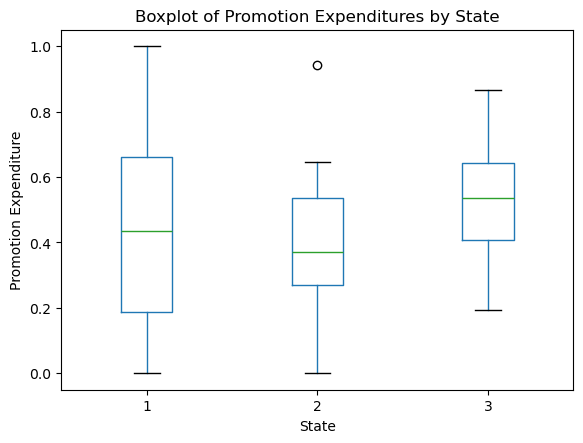

In [171]:
# Q5
plt.figure(figsize=(10, 6))
boxplot = company.boxplot(column='scaler_Promotions_Exp', by='State_encoded', grid=False)
plt.title('Boxplot of Promotion Expenditures by State')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('Promotion Expenditure')
plt.show()

<Axes: xlabel='State_encoded', ylabel='scaler_Productivity_Exp'>

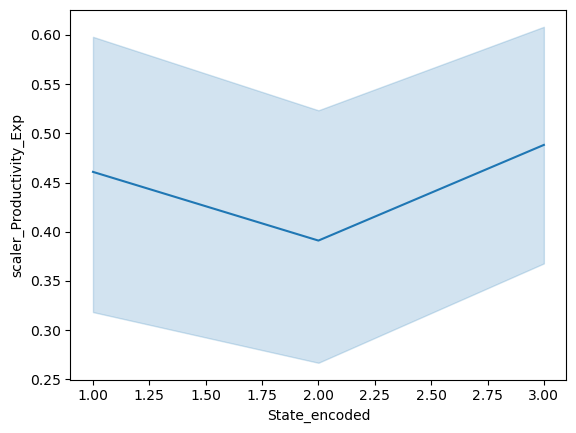

In [170]:
# Q6
sb.lineplot(data=company,x="State_encoded",y="scaler_Productivity_Exp")

<Axes: xlabel='State_encoded', ylabel='scaler_Promotions_Exp'>

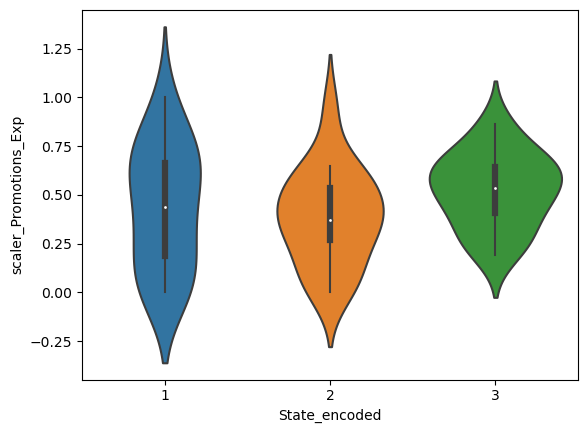

In [169]:
# Q7
sb.violinplot(data=company,x="State_encoded",y="scaler_Promotions_Exp")

Text(0.5, 0, 'State')

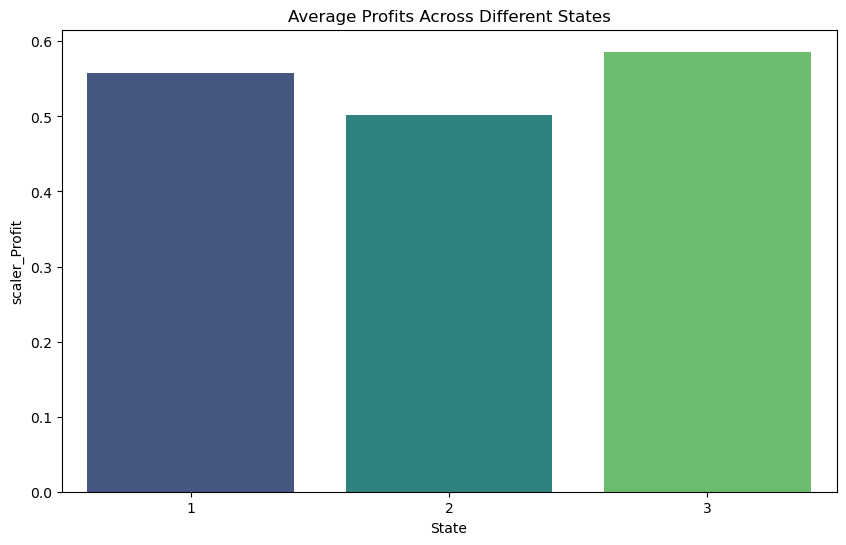

In [168]:
# Q8
average_profits = company.groupby('State_encoded')['scaler_Profit'].mean().reset_index()
plt.figure(figsize=(10, 6))
sb.barplot(data=average_profits, x='State_encoded', y='scaler_Profit', palette='viridis')
plt.title('Average Profits Across Different States')
plt.xlabel('State')

<Axes: xlabel='State_encoded', ylabel='scaler_Productivity_Exp'>

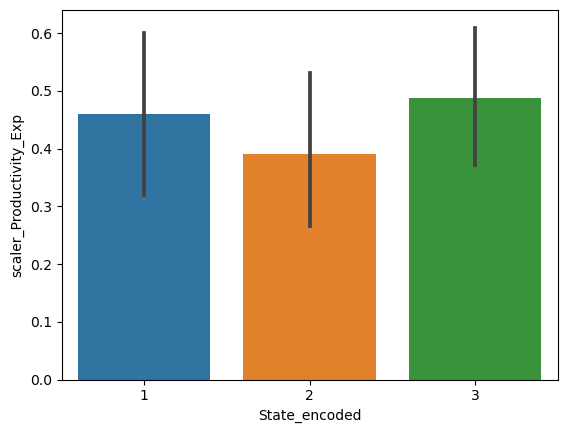

In [167]:
# Q9
sb.barplot(data=company,x="State_encoded",y="scaler_Productivity_Exp")

In [177]:
# Q10
company[["scaler_Management_Exp","scaler_Profit"]].corr()

,scaler_Management_Exp,scaler_Profit
scaler_Management_Exp,1.000000,0.200717
scaler_Profit,0.200717,1.000000


In [178]:
# Q11
company[["scaler_Productivity_Exp","scaler_Promotions_Exp"]].corr()

,scaler_Productivity_Exp,scaler_Promotions_Exp
scaler_Productivity_Exp,1.000000,0.724248
scaler_Promotions_Exp,0.724248,1.000000


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [159]:
# Q12
X = company[['scaler_Productivity_Exp', 'scaler_Management_Exp', 'scaler_Promotions_Exp']]
y = company['scaler_Profit']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [132]:
X_test.head(3)

,scaler_Productivity_Exp,scaler_Management_Exp,scaler_Promotions_Exp
13,0.556352,0.641066,0.535552
39,0.233194,0.241309,0.370931
30,0.374931,0.489928,0.193163


In [121]:
model.predict([[0.374931,0.489928,0.193163]]) 

array([0.4742193])

In [123]:
model.predict([[0.522650,0.778236,0.000000]]) 

array([0.55425477])

In [179]:
# Q13
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0025662537203763047


In [180]:
# Q14
company[["scaler_Productivity_Exp","scaler_Profit"]].corr()

,scaler_Productivity_Exp,scaler_Profit
scaler_Productivity_Exp,1.0000,0.9729
scaler_Profit,0.9729,1.0000


In [165]:
# Q15
data_rsme = {'Actual(y_test)':y_test,'Prediction(y_pred)':y_pred}
df_rsme = pd.DataFrame(data_rsme)
df_rsme

,Actual(y_test),Prediction(y_pred)
13,0.673644,0.630822
39,0.373489,0.395389
30,0.480099,0.474219
45,0.282940,0.179188
17,0.623317,0.644480
48,0.118211,0.204478
26,0.512737,0.531225
25,0.522146,0.485397
32,0.465966,0.467502
19,0.608713,0.554255


## Report on Company Dataset :

In [ ]:
Q1:
The total production expenditure across all states is 22.29270404695033.
Q2:
The State with highest average production expenditure is Washington.
Q3:
The average profit-to-expenditure ratio for each state will be 1.406560 : Texas, 0.373581 : Illinois and 0.377737 : Washington.
Q4:
The State with highest return on investment (ROI) based on profits and total expenditure is Texas.
Q5:
Yes, their is an outliers in the promotion expenditure column and it is in Illinois state.
Q6:
Production Expenditure vary over time within each state as follows, from texas to illinios it gradually decreases and from  illinios to washington it
gradually increases.
Q7:
The Promotion Expenditure keep on decreasing over the years in all the three states.
Q8:
The Profitability of company vary across different states like as follows, texas : 55%, illinios : 48% and washington : 58%.
Q9:
The states with max Productivity wil be like Texas : ~45%, Illinios : 38% and Washington : 52%.
Q10:
There is a Weak Co-relation between Management Expenditure and Profits.
Q11:
There is a Strong Co-relation between Production Expenditure and Promotion Expenditrue.
Q12:
Predicting the profits of [Production, Management, Promotion : 0.522650,0.778236,0.000000], and it is 0.55425477.
Q13:
The MSE[Mean Square Error] will be 0.0025662537203763047.
Q14
There is a Strong Co-relation between Production Expenditure and Profits.
Q15:
The average difference between values predicted by a model and the actual values are vary near by values.